# CHAPTER 10 - SIMPLE LINEAR REGRESSION

# by Luka Zekanovic

## What does a Simple Linear Regression model do?

#### It is a conceptual model that uses an equation to predict an unknown value called a dependant variable based on the values of one or more known values called independant variables

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
data = sns.load_dataset('diamonds')

In [7]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
* The R-value measures the type and strength of the linear correlation between two variables
* R-value is a number between 1.0 and -1.0
* When the R-value is close to 1.0, it forms a strong positive correlation
* When the R-value is close to -1.0, it forms a strong negative correlation
* When the R-value is 0.0, it shows no correlation

In [8]:
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]
correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

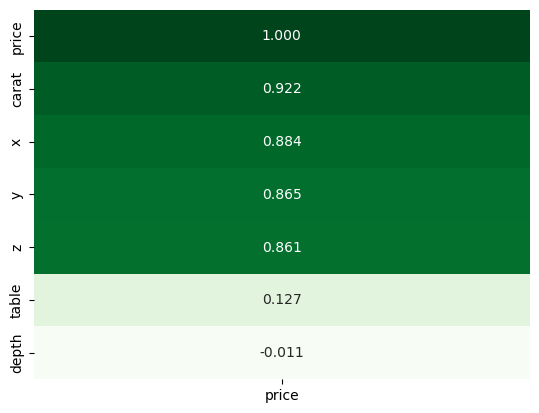

In [9]:
sns.heatmap(data=numeric_data.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='Greens', cbar=False,fmt=f'.3f')

## Procedure for Creating and Using a Regression Model
1. Split the dataset into a training dataset that is used to train the model and test the dataset that is used to validate the model
2. We use the training dataset to create the regression model
3. The test dataset runs against the model to help see how accurate the results of the model are, if the values that are generated by the model closer to the actual values, then the model is considered to be acurate
4. When the model is accurate, you can use it to predict the dependant variable based on the independant variables

In [10]:
x_train, x_test, y_train, y_test = train_test_split(numeric_data[['carat']], numeric_data[['price']], test_size=0.3, random_state=20)

In [11]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [12]:
linear_model.score(x_test, y_test)

0.8504107786474794

In [13]:
y_predict = linear_model.predict(x_test)
y_predict

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [20]:
predicted_price = pd.DataFrame(y_predict, columns=['price_predicted'])
predicted_price.head(3)

,price_predicted
0,9540.641914
1,1940.075433
2,3180.984246


In [21]:
combined_price = predicted_price.join([y_test.reset_index(drop=True), x_test.reset_index(drop=True)])
combined_price.head()

,price_predicted,price,carat
0,9540.641914,8674,1.52
1,1940.075433,1637,0.54
2,3180.984246,2657,0.70
3,2327.859437,1838,0.59
4,4421.893059,2980,0.86


In [23]:
melted_price = pd.melt(combined_price, id_vars=['carat'], value_vars=['price','price_predicted'], var_name='price_type', value_name='price_value')
melted_price

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,price_predicted,156.269013
32360,1.01,price_predicted,5585.245072
32361,1.53,price_predicted,9618.198715
32362,0.23,price_predicted,-464.185393


C:\Users\lukaz\OneDrive\Notebook\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)


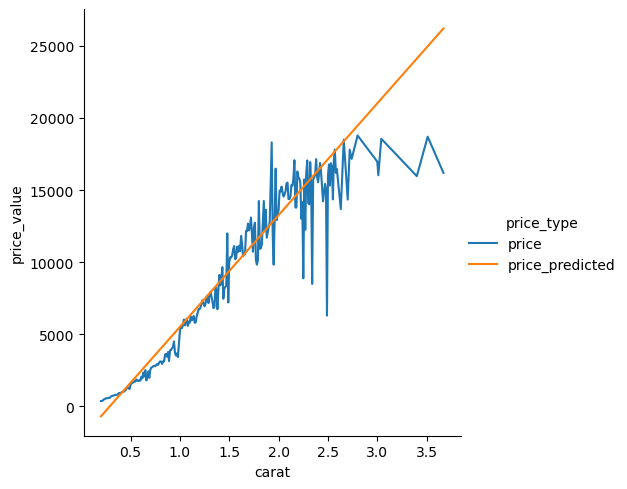

In [24]:
sns.relplot(data=melted_price, kind='line', x='carat', y='price_value', hue='price_type', ci=False)

## Regression line equation is **y = mx + b**, where
* y is the **dependant** variable
* m is the **slope** of the line
* x is the **independant** variable
* b is the **y-intercept**

In [25]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [26]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [29]:
m = predicted.coef_
b = predicted.intercept_
print(f'Slope:{m}, y-intercept:{b}')

Slope:[7756.42561797], y-intercept:-2256.360580045423


In [30]:
print(f'Regression line equation is y = {m}x + {b}')

Regression line equation is y = [7756.42561797]x + -2256.360580045423


In [32]:
print(f'The predicted price for a 0.70 carat diamond is $3,173.141')

The predicted price for a 0.70 carat diamond is $3,173.141


In [33]:
print(f'The predicted price for a 0.54 carat diamond is $1,932.11')

The predicted price for a 0.54 carat diamond is $1,932.11


## The results are similar to the results in Step 18